Perceptron en python

Autor: Cristian Manuel Brito Pardo

In [20]:
import numpy as np

class perceptron(object):
  '''clasificador perceptron.'''
  def __init__(self, eta = 0.5, n_iter = 50, random_state = 1):
      self.eta = eta #Tasa de aprendizaje (entre 0.0 y 1.0)
      self.n_iter = n_iter #Numero de veces que se va a pasar el conjunto de datos
      self.random_state = random_state # semilla del generador de numeros aleatorios

  def fit (self, X, y):
      ''' Ajuste de los datos
      X: Vector de datos de entrenamiento
        n_features: Numero de caracteristicas
      y: Vector de etiquetas de respuesta

      self: Object
      '''

      rgen = np.random.RandomState(self.random_state) #Generamos numeros aleatorios
      #self .w_ = rgen.normal(loc = 0.0, scale = 0.01, size = 1 + X.shape[1]) #Numeros aleatorios con dev est 0.01
      self.w_ = [0,0,0] #Inicializar pesos en cero
      self.errores_ = [] #Lista vacia para los errores
      print('Pesos iniciales', self.w_)

      for _ in range(self.n_iter): #Ciclo que se repite segun el numero de iteraciones
        errores = 0
        for xi, etiqueta in zip(X, y): #Ciclo que se repite segun el numero de muestras
          actualizacion = self.eta * (etiqueta - self.predice(xi))
          self.w_[1:] += actualizacion * xi
          self.w_[0] += actualizacion
          errores += int(actualizacion != 0)
        self.errores_.append(errores)
        print('Pesos en epoch', _ , ':', self.w_)
      return self

      def entrada_neta (self, X):
        'Calculo de la entrada neta'
        return np.dot(X, self.w_[1:]) + self.w_[0]

      def predice(self, X):
        'Etiqueta de clase de retorno despues del paso unitario'
        np.where(self.entrada_neta(X) >= 0.0, 1, -1)

In [13]:
Datos = [[1,1], [1,-1], [-1,1], [-1,-1]]
X = np.array(Datos)
y = [1, 1, 1, -1]

print(X)
print(y)

[[ 1  1]
 [ 1 -1]
 [-1  1]
 [-1 -1]]
[1, 1, 1, -1]


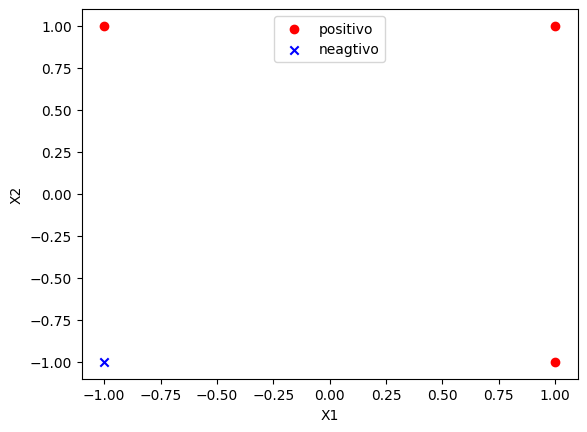

In [14]:
%matplotlib inline
import matplotlib.pyplot as plt

#Visualizar los datos
plt.scatter(X[0:3, 0], X[0:3, 1], color = 'red', marker = 'o', label = 'positivo')
plt.scatter(X[3, 0], X[3, 1], color = 'blue', marker = 'x', label = 'neagtivo')
plt.xlabel('X1')
plt.ylabel('X2')
plt.legend(loc = 'upper center')
plt.show()

Pesos iniciales [ 0.01624345 -0.00611756 -0.00528172]
Pesos en epoch 0 : [-0.98375655  0.99388244  0.99471828]
Pesos en epoch 1 : [1.01624345 0.99388244 0.99471828]
Pesos en epoch 2 : [1.01624345 0.99388244 0.99471828]
Pesos en epoch 3 : [1.01624345 0.99388244 0.99471828]
Pesos en epoch 4 : [1.01624345 0.99388244 0.99471828]
Pesos en epoch 5 : [1.01624345 0.99388244 0.99471828]
Pesos en epoch 6 : [1.01624345 0.99388244 0.99471828]
Pesos en epoch 7 : [1.01624345 0.99388244 0.99471828]
Pesos en epoch 8 : [1.01624345 0.99388244 0.99471828]
Pesos en epoch 9 : [1.01624345 0.99388244 0.99471828]


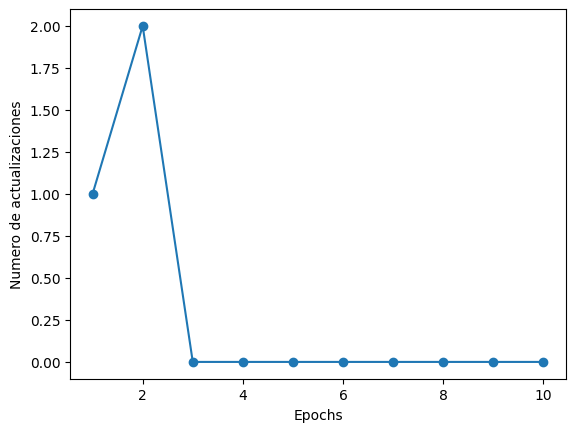

In [22]:
ppn = Perceptron(eta = 0.5, n_iter = 10)

ppn.fit(X,y)

plt.plot(range(1, len(ppn.errores_) + 1), ppn.errores_, marker = 'o')
plt.xlabel('Epochs')
plt.ylabel('Numero de actualizaciones')
plt.show()

In [23]:

from matplotlib.colors import ListedColormap

def plot_decision_regions(X, y, classifier, resolution=0.02):

    #Configurar generador de marcadores y mapa de colores
    markers = ('s', 'x', 'o', '^', 'v')
    colors = ('red', 'blue', 'lightgreen', 'gray', 'cyan')
    cmap = ListedColormap(colors[:len(np.unique(y))])

    #Trazar la superficie de decisión
    x1_min, x1_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    x2_min, x2_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution),
                           np.arange(x2_min, x2_max, resolution))
    Z = classifier.predice(np.array([xx1.ravel(), xx2.ravel()]).T)
    Z = Z.reshape(xx1.shape)
    plt.contourf(xx1, xx2, Z, alpha=0.3, cmap=cmap)
    plt.xlim(xx1.min(), xx1.max())
    plt.ylim(xx2.min(), xx2.max())

    #Ejemplos de clases de trama
    for idx, cl in enumerate(np.unique(y)):
        plt.scatter(x=X[y == cl, 0],
                    y=X[y == cl, 1],
                    alpha=0.8,
                    c=colors[idx],
                    marker=markers[idx],
                    label=cl,
                    edgecolor='black')

<ipython-input-23-c0de6c2e6d12>:23: UserWarning: You passed a edgecolor/edgecolors ('black') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  plt.scatter(x=X[y == cl, 0],


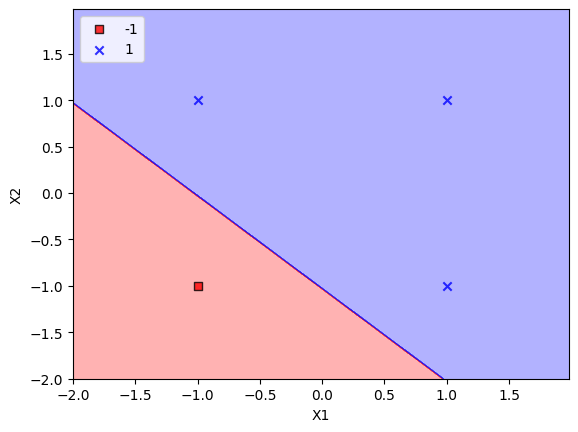

In [24]:
plot_decision_regions(X, y, classifier=ppn)
plt.xlabel('X1')
plt.ylabel('X2')
plt.legend(loc='upper left')

# plt.savefig('images/02_08.png', dpi=300)
plt.show()